In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
le= LabelEncoder()
from sklearn.impute import SimpleImputer
import torch
from sklearn.model_selection import train_test_split

In [ ]:
train=pd.read_csv('cicids_18.csv')

In [ ]:
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
train["Label"].unique()

array(['Benign', 'Bot', nan], dtype=object)

In [ ]:
print(train["Label"].value_counts()[['Benign']].sum())
print(train["Label"].value_counts()[['Bot']].sum())

49808
221443


In [ ]:
train.drop(train.loc[train["Label"] == "Label"].index, inplace=True)

In [ ]:
train

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0            443         6  02/03/2018 08:47:38         141385             9   
1          49684         6  02/03/2018 08:47:38            281             2   
2            443         6  02/03/2018 08:47:40         279824            11   
3            443         6  02/03/2018 08:47:40            132             2   
4            443         6  02/03/2018 08:47:41         274016             9   
...          ...       ...                  ...            ...           ...   
271247      8080         6  02/03/2018 03:41:44          59476             3   
271248      8080         6  02/03/2018 03:41:44            551             2   
271249      8080         6  02/03/2018 03:41:44           8624             3   
271250      8080         6  02/03/2018 03:41:44            464             2   
271251      8080         6  02/03/2018 03:41:44          15558             2   

        Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                  7              553           3773.0              202   
1                  1               38              0.0               38   
2                 15             1086          10527.0              385   
3                  0                0              0.0                0   
4                 13             1285           6141.0              517   
...              ...              ...              ...              ...   
271247             4              326            129.0              326   
271248             0                0              0.0                0   
271249             4              365            129.0              365   
271250             0                0              0.0                0   
271251            12                0            129.0                0   

        Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                     0  ...              20.0          0.0         0.0   
1                     0  ...              20.0          0.0         0.0   
2                     0  ...              20.0          0.0         0.0   
3                     0  ...              20.0          0.0         0.0   
4                     0  ...              20.0          0.0         0.0   
...                 ...  ...               ...          ...         ...   
271247                0  ...              20.0          0.0         0.0   
271248                0  ...              20.0          0.0         0.0   
271249                0  ...              20.0          0.0         0.0   
271250                0  ...              20.0          0.0         0.0   
271251                0  ...               NaN          NaN         NaN   

        Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
0              0.0         0.0        0.0       0.0       0.0       0.0   
1              0.0         0.0        0.0       0.0       0.0       0.0   
2              0.0         0.0        0.0       0.0       0.0       0.0   
3              0.0         0.0        0.0       0.0       0.0       0.0   
4              0.0         0.0        0.0       0.0       0.0       0.0   
...            ...         ...        ...       ...       ...       ...   
271247         0.0         0.0        0.0       0.0       0.0       0.0   
271248         0.0         0.0        0.0       0.0       0.0       0.0   
271249         0.0         0.0        0.0       0.0       0.0       0.0   
271250         0.0         0.0        0.0       0.0       0.0       0.0   
271251         NaN         NaN        NaN       NaN       NaN       NaN   

         Label  
0       Benign  
1       Benign  
2       Benign  
3       Benign  
4       Benign  
...        ...  
271247     Bot  
271248     Bot  
271249     Bot  
271250     Bot  
271251     NaN  

[271252 rows x 80 columns]

In [ ]:
train["Protocol"].unique()
# Forcing them to be strings
train = train.astype({"Protocol": str})
train["Protocol"].unique()
train = pd.get_dummies(train, columns=['Protocol'], drop_first=True)
train

Dst Port            Timestamp  Flow Duration  Tot Fwd Pkts  \
0            443  02/03/2018 08:47:38         141385             9   
1          49684  02/03/2018 08:47:38            281             2   
2            443  02/03/2018 08:47:40         279824            11   
3            443  02/03/2018 08:47:40            132             2   
4            443  02/03/2018 08:47:41         274016             9   
...          ...                  ...            ...           ...   
271247      8080  02/03/2018 03:41:44          59476             3   
271248      8080  02/03/2018 03:41:44            551             2   
271249      8080  02/03/2018 03:41:44           8624             3   
271250      8080  02/03/2018 03:41:44            464             2   
271251      8080  02/03/2018 03:41:44          15558             2   

        Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                  7              553           3773.0              202   
1                  1               38              0.0               38   
2                 15             1086          10527.0              385   
3                  0                0              0.0                0   
4                 13             1285           6141.0              517   
...              ...              ...              ...              ...   
271247             4              326            129.0              326   
271248             0                0              0.0                0   
271249             4              365            129.0              365   
271250             0                0              0.0                0   
271251            12                0            129.0                0   

        Fwd Pkt Len Min  Fwd Pkt Len Mean  ...  Active Std  Active Max  \
0                     0         61.444444  ...         0.0         0.0   
1                     0         19.000000  ...         0.0         0.0   
2                     0         98.727273  ...         0.0         0.0   
3                     0          0.000000  ...         0.0         0.0   
4                     0        142.777778  ...         0.0         0.0   
...                 ...               ...  ...         ...         ...   
271247                0        108.666667  ...         0.0         0.0   
271248                0          0.000000  ...         0.0         0.0   
271249                0        121.666667  ...         0.0         0.0   
271250                0          0.000000  ...         0.0         0.0   
271251                0          0.000000  ...         NaN         NaN   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  \
0              0.0        0.0       0.0       0.0       0.0  Benign   
1              0.0        0.0       0.0       0.0       0.0  Benign   
2              0.0        0.0       0.0       0.0       0.0  Benign   
3              0.0        0.0       0.0       0.0       0.0  Benign   
4              0.0        0.0       0.0       0.0       0.0  Benign   
...            ...        ...       ...       ...       ...     ...   
271247         0.0        0.0       0.0       0.0       0.0     Bot   
271248         0.0        0.0       0.0       0.0       0.0     Bot   
271249         0.0        0.0       0.0       0.0       0.0     Bot   
271250         0.0        0.0       0.0       0.0       0.0     Bot   
271251         NaN        NaN       NaN       NaN       NaN     NaN   

        Protocol_17  Protocol_6  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False        True  
...             ...         ...  
271247        False        True  
271248        False        True  
271249        False        True  
271250        False        True  
271251        False        True  

[271252 rows x 81 columns]

In [ ]:
columns_to_drop = [
    'Dst Port',
    'Timestamp',
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'Flow Byts/s',  # This field had np.inf values during training, as such was removed
    'Flow Pkts/s'  # This field had np.inf values during training, as such was removed
]

In [ ]:
train.drop(columns=columns_to_drop, inplace=True)
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0              141385             9             7              553   
1                 281             2             1               38   
2              279824            11            15             1086   
3                 132             2             0                0   
4              274016             9            13             1285   
...               ...           ...           ...              ...   
271247          59476             3             4              326   
271248            551             2             0                0   
271249           8624             3             4              365   
271250            464             2             0                0   
271251          15558             2            12                0   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                3773.0              202                0         61.444444   
1                   0.0               38                0         19.000000   
2               10527.0              385                0         98.727273   
3                   0.0                0                0          0.000000   
4                6141.0              517                0        142.777778   
...                 ...              ...              ...               ...   
271247            129.0              326                0        108.666667   
271248              0.0                0                0          0.000000   
271249            129.0              365                0        121.666667   
271250              0.0                0                0          0.000000   
271251            129.0                0                0          0.000000   

        Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0             87.534438             1460  ...         0.0         0.0   
1             26.870058                0  ...         0.0         0.0   
2            129.392497             1460  ...         0.0         0.0   
3              0.000000                0  ...         0.0         0.0   
4            183.887722             1460  ...         0.0         0.0   
...                 ...              ...  ...         ...         ...   
271247       188.216188              112  ...         0.0         0.0   
271248         0.000000                0  ...         0.0         0.0   
271249       210.732848              112  ...         0.0         0.0   
271250         0.000000                0  ...         0.0         0.0   
271251         0.000000              112  ...         NaN         NaN   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  \
0              0.0        0.0       0.0       0.0       0.0  Benign   
1              0.0        0.0       0.0       0.0       0.0  Benign   
2              0.0        0.0       0.0       0.0       0.0  Benign   
3              0.0        0.0       0.0       0.0       0.0  Benign   
4              0.0        0.0       0.0       0.0       0.0  Benign   
...            ...        ...       ...       ...       ...     ...   
271247         0.0        0.0       0.0       0.0       0.0     Bot   
271248         0.0        0.0       0.0       0.0       0.0     Bot   
271249         0.0        0.0       0.0       0.0       0.0     Bot   
271250         0.0        0.0       0.0       0.0       0.0     Bot   
271251         NaN        NaN       NaN       NaN       NaN     NaN   

        Protocol_17  Protocol_6  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False        True  
...             ...         ...  
271247        False        True  
271248        False        True  
271249        False        True  
271250        False        True  
271251        False        True  

[271252 rows x 73 columns]

In [ ]:
train.dropna(inplace=True)
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0              141385             9             7              553   
1                 281             2             1               38   
2              279824            11            15             1086   
3                 132             2             0                0   
4              274016             9            13             1285   
...               ...           ...           ...              ...   
271246            384             2             0                0   
271247          59476             3             4              326   
271248            551             2             0                0   
271249           8624             3             4              365   
271250            464             2             0                0   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                3773.0              202                0         61.444444   
1                   0.0               38                0         19.000000   
2               10527.0              385                0         98.727273   
3                   0.0                0                0          0.000000   
4                6141.0              517                0        142.777778   
...                 ...              ...              ...               ...   
271246              0.0                0                0          0.000000   
271247            129.0              326                0        108.666667   
271248              0.0                0                0          0.000000   
271249            129.0              365                0        121.666667   
271250              0.0                0                0          0.000000   

        Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0             87.534438             1460  ...         0.0         0.0   
1             26.870058                0  ...         0.0         0.0   
2            129.392497             1460  ...         0.0         0.0   
3              0.000000                0  ...         0.0         0.0   
4            183.887722             1460  ...         0.0         0.0   
...                 ...              ...  ...         ...         ...   
271246         0.000000                0  ...         0.0         0.0   
271247       188.216188              112  ...         0.0         0.0   
271248         0.000000                0  ...         0.0         0.0   
271249       210.732848              112  ...         0.0         0.0   
271250         0.000000                0  ...         0.0         0.0   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  \
0              0.0        0.0       0.0       0.0       0.0  Benign   
1              0.0        0.0       0.0       0.0       0.0  Benign   
2              0.0        0.0       0.0       0.0       0.0  Benign   
3              0.0        0.0       0.0       0.0       0.0  Benign   
4              0.0        0.0       0.0       0.0       0.0  Benign   
...            ...        ...       ...       ...       ...     ...   
271246         0.0        0.0       0.0       0.0       0.0     Bot   
271247         0.0        0.0       0.0       0.0       0.0     Bot   
271248         0.0        0.0       0.0       0.0       0.0     Bot   
271249         0.0        0.0       0.0       0.0       0.0     Bot   
271250         0.0        0.0       0.0       0.0       0.0     Bot   

        Protocol_17  Protocol_6  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False        True  
...             ...         ...  
271246        False        True  
271247        False        True  
271248        False        True  
271249        False        True  
271250        False        True  

[271251 rows x 73 columns]

In [ ]:
train.drop_duplicates(inplace=True)
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0              141385             9             7              553   
1                 281             2             1               38   
2              279824            11            15             1086   
3                 132             2             0                0   
4              274016             9            13             1285   
...               ...           ...           ...              ...   
271241          11246             3             4              326   
271243          24035             3             4              326   
271245          10642             3             4              285   
271247          59476             3             4              326   
271249           8624             3             4              365   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                3773.0              202                0         61.444444   
1                   0.0               38                0         19.000000   
2               10527.0              385                0         98.727273   
3                   0.0                0                0          0.000000   
4                6141.0              517                0        142.777778   
...                 ...              ...              ...               ...   
271241            129.0              326                0        108.666667   
271243            140.0              326                0        108.666667   
271245            129.0              285                0         95.000000   
271247            129.0              326                0        108.666667   
271249            129.0              365                0        121.666667   

        Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0             87.534438             1460  ...         0.0         0.0   
1             26.870058                0  ...         0.0         0.0   
2            129.392497             1460  ...         0.0         0.0   
3              0.000000                0  ...         0.0         0.0   
4            183.887722             1460  ...         0.0         0.0   
...                 ...              ...  ...         ...         ...   
271241       188.216188              112  ...         0.0         0.0   
271243       188.216188              123  ...         0.0         0.0   
271245       164.544827              112  ...         0.0         0.0   
271247       188.216188              112  ...         0.0         0.0   
271249       210.732848              112  ...         0.0         0.0   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  \
0              0.0        0.0       0.0       0.0       0.0  Benign   
1              0.0        0.0       0.0       0.0       0.0  Benign   
2              0.0        0.0       0.0       0.0       0.0  Benign   
3              0.0        0.0       0.0       0.0       0.0  Benign   
4              0.0        0.0       0.0       0.0       0.0  Benign   
...            ...        ...       ...       ...       ...     ...   
271241         0.0        0.0       0.0       0.0       0.0     Bot   
271243         0.0        0.0       0.0       0.0       0.0     Bot   
271245         0.0        0.0       0.0       0.0       0.0     Bot   
271247         0.0        0.0       0.0       0.0       0.0     Bot   
271249         0.0        0.0       0.0       0.0       0.0     Bot   

        Protocol_17  Protocol_6  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False        True  
...             ...         ...  
271241        False        True  
271243        False        True  
271245        False        True  
271247        False        True  
271249        False        True  

[158014 rows x 73 columns]

In [ ]:
print(train["Label"].value_counts()[['Benign']].sum())
print(train["Label"].value_counts()[['Bot']].sum())

45965
112049


In [ ]:
train.replace(to_replace="Benign", value=0, inplace=True)
train.replace(to_replace="Bot", value=1, inplace=True)
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0              141385             9             7              553   
1                 281             2             1               38   
2              279824            11            15             1086   
3                 132             2             0                0   
4              274016             9            13             1285   
...               ...           ...           ...              ...   
271241          11246             3             4              326   
271243          24035             3             4              326   
271245          10642             3             4              285   
271247          59476             3             4              326   
271249           8624             3             4              365   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                3773.0              202                0         61.444444   
1                   0.0               38                0         19.000000   
2               10527.0              385                0         98.727273   
3                   0.0                0                0          0.000000   
4                6141.0              517                0        142.777778   
...                 ...              ...              ...               ...   
271241            129.0              326                0        108.666667   
271243            140.0              326                0        108.666667   
271245            129.0              285                0         95.000000   
271247            129.0              326                0        108.666667   
271249            129.0              365                0        121.666667   

        Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0             87.534438             1460  ...         0.0         0.0   
1             26.870058                0  ...         0.0         0.0   
2            129.392497             1460  ...         0.0         0.0   
3              0.000000                0  ...         0.0         0.0   
4            183.887722             1460  ...         0.0         0.0   
...                 ...              ...  ...         ...         ...   
271241       188.216188              112  ...         0.0         0.0   
271243       188.216188              123  ...         0.0         0.0   
271245       164.544827              112  ...         0.0         0.0   
271247       188.216188              112  ...         0.0         0.0   
271249       210.732848              112  ...         0.0         0.0   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  \
0              0.0        0.0       0.0       0.0       0.0      0   
1              0.0        0.0       0.0       0.0       0.0      0   
2              0.0        0.0       0.0       0.0       0.0      0   
3              0.0        0.0       0.0       0.0       0.0      0   
4              0.0        0.0       0.0       0.0       0.0      0   
...            ...        ...       ...       ...       ...    ...   
271241         0.0        0.0       0.0       0.0       0.0      1   
271243         0.0        0.0       0.0       0.0       0.0      1   
271245         0.0        0.0       0.0       0.0       0.0      1   
271247         0.0        0.0       0.0       0.0       0.0      1   
271249         0.0        0.0       0.0       0.0       0.0      1   

        Protocol_17  Protocol_6  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False        True  
...             ...         ...  
271241        False        True  
271243        False        True  
271245        False        True  
271247        False        True  
271249        False        True  

[158014 rows x 73 columns]

In [ ]:
train.info

<bound method DataFrame.info of         Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0              141385             9             7              553   
1                 281             2             1               38   
2              279824            11            15             1086   
3                 132             2             0                0   
4              274016             9            13             1285   
...               ...           ...           ...              ...   
271241          11246             3             4              326   
271243          24035             3             4              326   
271245          10642             3             4              285   
271247          59476             3             4              326   
271249           8624             3             4              365   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                3773.0              202                0         61.444444   
1                   0.0               38                0         19.000000   
2               10527.0              385                0         98.727273   
3                   0.0                0                0          0.000000   
4                6141.0              517                0        142.777778   
...                 ...              ...              ...               ...   
271241            129.0              326                0        108.666667   
271243            140.0              326                0        108.666667   
271245            129.0              285                0         95.000000   
271247            129.0              326                0        108.666667   
271249            129.0              365                0        121.666667   

        Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0             87.534438             1460  ...         0.0         0.0   
1             26.870058                0  ...         0.0         0.0   
2            129.392497             1460  ...         0.0         0.0   
3              0.000000                0  ...         0.0         0.0   
4            183.887722             1460  ...         0.0         0.0   
...                 ...              ...  ...         ...         ...   
271241       188.216188              112  ...         0.0         0.0   
271243       188.216188              123  ...         0.0         0.0   
271245       164.544827              112  ...         0.0         0.0   
271247       188.216188              112  ...         0.0         0.0   
271249       210.732848              112  ...         0.0         0.0   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  \
0              0.0        0.0       0.0       0.0       0.0      0   
1              0.0        0.0       0.0       0.0       0.0      0   
2              0.0        0.0       0.0       0.0       0.0      0   
3              0.0        0.0       0.0       0.0       0.0      0   
4              0.0        0.0       0.0       0.0       0.0      0   
...            ...        ...       ...       ...       ...    ...   
271241         0.0        0.0       0.0       0.0       0.0      1   
271243         0.0        0.0       0.0       0.0       0.0      1   
271245         0.0        0.0       0.0       0.0       0.0      1   
271247         0.0        0.0       0.0       0.0       0.0      1   
271249         0.0        0.0       0.0       0.0       0.0      1   

        Protocol_17  Protocol_6  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False        True  
...             ...         ...  
271241        False        True  
271243        False        True  
271245        False        True  
271247        False        True  
271249        False        True  

[158014 rows x 73 columns]>

In [ ]:
train = pd.DataFrame(train)
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
train

In [ ]:
train.columns

In [ ]:
train["Label"].value_counts()

Label
1    112049
0     45965
Name: count, dtype: int64

<Axes: >

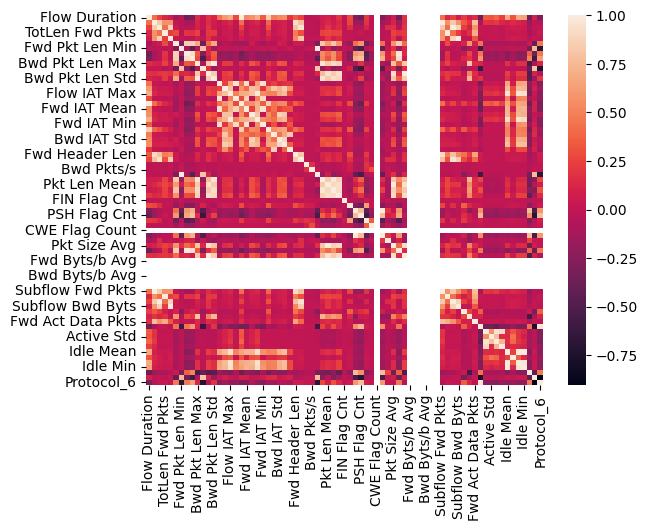

In [ ]:
import seaborn as sns
sns.heatmap(train.corr(numeric_only=True))

In [ ]:
X = train.drop(["Label"], axis=1)
# X = X[numeric_columns]

y =  train["Label"]

print(X.info())
print(y.info())

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)

le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

In [ ]:
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0              141385             9             7              553   
1                 281             2             1               38   
2              279824            11            15             1086   
3                 132             2             0                0   
4              274016             9            13             1285   
...               ...           ...           ...              ...   
271241          11246             3             4              326   
271243          24035             3             4              326   
271245          10642             3             4              285   
271247          59476             3             4              326   
271249           8624             3             4              365   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                3773.0              202                0         61.444444   
1                   0.0               38                0         19.000000   
2               10527.0              385                0         98.727273   
3                   0.0                0                0          0.000000   
4                6141.0              517                0        142.777778   
...                 ...              ...              ...               ...   
271241            129.0              326                0        108.666667   
271243            140.0              326                0        108.666667   
271245            129.0              285                0         95.000000   
271247            129.0              326                0        108.666667   
271249            129.0              365                0        121.666667   

        Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0             87.534438             1460  ...         0.0         0.0   
1             26.870058                0  ...         0.0         0.0   
2            129.392497             1460  ...         0.0         0.0   
3              0.000000                0  ...         0.0         0.0   
4            183.887722             1460  ...         0.0         0.0   
...                 ...              ...  ...         ...         ...   
271241       188.216188              112  ...         0.0         0.0   
271243       188.216188              123  ...         0.0         0.0   
271245       164.544827              112  ...         0.0         0.0   
271247       188.216188              112  ...         0.0         0.0   
271249       210.732848              112  ...         0.0         0.0   

        Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  \
0              0.0        0.0       0.0       0.0       0.0      0   
1              0.0        0.0       0.0       0.0       0.0      0   
2              0.0        0.0       0.0       0.0       0.0      0   
3              0.0        0.0       0.0       0.0       0.0      0   
4              0.0        0.0       0.0       0.0       0.0      0   
...            ...        ...       ...       ...       ...    ...   
271241         0.0        0.0       0.0       0.0       0.0      1   
271243         0.0        0.0       0.0       0.0       0.0      1   
271245         0.0        0.0       0.0       0.0       0.0      1   
271247         0.0        0.0       0.0       0.0       0.0      1   
271249         0.0        0.0       0.0       0.0       0.0      1   

        Protocol_17  Protocol_6  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False        True  
...             ...         ...  
271241        False        True  
271243        False        True  
271245        False        True  
271247        False        True  
271249        False        True  

[158014 rows x 73 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
original_columns= train.columns.tolist()
scaler = MinMaxScaler()
train_scaled_values= scaler.fit_transform(train)
train_scaled=pd.DataFrame(train_scaled_values,columns=original_columns)

In [ ]:
train_scaled.columns


In [ ]:
final_data = train_scaled.groupby('Label').apply(lambda x: x.sample(frac=0.1,random_state=38))
final_data.shape

(15801, 73)

In [ ]:
final_data.groupby(level='Label').size()

Label
0.0     4596
1.0    11205
dtype: int64

In [ ]:
final_data

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Label                                                                      
0.0   24683        0.018326      0.002201      0.000863         0.007585   
      135348       0.000001      0.000314      0.000000         0.000000   
      72614        0.016822      0.002201      0.000863         0.007585   
      18930        0.000261      0.000629      0.000123         0.000000   
      34656        0.013996      0.002201      0.000863         0.007585   
...                     ...           ...           ...              ...   
1.0   88155        0.000192      0.000629      0.000493         0.002192   
      28965        0.000088      0.000629      0.000493         0.002192   
      103269       0.000079      0.000629      0.000493         0.002192   
      64886        0.000094      0.000629      0.000493         0.002192   
      131402       0.000090      0.000629      0.000493         0.002192   

              TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
Label                                                             
0.0   24683          0.000135         0.386324              0.0   
      135348         0.000000         0.000000              0.0   
      72614          0.000135         0.386324              0.0   
      18930          0.000000         0.000000              0.0   
      34656          0.000135         0.386324              0.0   
...                       ...              ...              ...   
1.0   88155          0.000011         0.190532              0.0   
      28965          0.000011         0.190532              0.0   
      103269         0.000011         0.190532              0.0   
      64886          0.000011         0.190532              0.0   
      131402         0.000011         0.190532              0.0   

              Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  ...  \
Label                                                             ...   
0.0   24683           0.114448         0.219552         0.803425  ...   
      135348          0.000000         0.000000         0.000000  ...   
      72614           0.114448         0.219552         0.803425  ...   
      18930           0.000000         0.000000         0.000000  ...   
      34656           0.114448         0.219552         0.803425  ...   
...                        ...              ...              ...  ...   
1.0   88155           0.088203         0.185619         0.076712  ...   
      28965           0.088203         0.185619         0.076712  ...   
      103269          0.088203         0.185619         0.076712  ...   
      64886           0.088203         0.185619         0.076712  ...   
      131402          0.088203         0.185619         0.076712  ...   

              Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
Label                                                                   
0.0   24683          0.0         0.0         0.0        0.0       0.0   
      135348         0.0         0.0         0.0        0.0       0.0   
      72614          0.0         0.0         0.0        0.0       0.0   
      18930          0.0         0.0         0.0        0.0       0.0   
      34656          0.0         0.0         0.0        0.0       0.0   
...                  ...         ...         ...        ...       ...   
1.0   88155          0.0         0.0         0.0        0.0       0.0   
      28965          0.0         0.0         0.0        0.0       0.0   
      103269         0.0         0.0         0.0        0.0       0.0   
      64886          0.0         0.0         0.0        0.0       0.0   
      131402         0.0         0.0         0.0        0.0       0.0   

              Idle Max  Idle Min  Label  Protocol_17  Protocol_6  
Label                                                             
0.0   24683        0.0       0.0    0.0          0.0         1.0  
      135348       0.0       0.0    0.0          0.0

In [ ]:
train

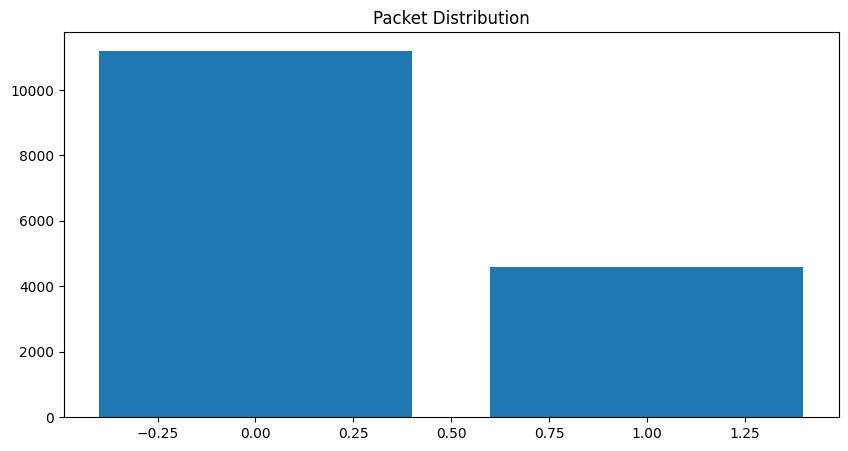

In [ ]:
import matplotlib.pyplot as plt
def visualizeBar(final_data):
    # bar chart of packets label
    plt.figure(figsize=(10, 5))
    plt.title('Packet Distribution')
    # plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
    plt.bar(x=final_data['Label'].unique(), height=final_data['Label'].value_counts())
    p = plt.gcf()
#%%time
# network_data = dropInfinateNull(network_data)
visualizeBar(final_data)

In [ ]:
final_data.head

<bound method NDFrame.head of               Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Label                                                                      
0.0   24683        0.018326      0.002201      0.000863         0.007585   
      135348       0.000001      0.000314      0.000000         0.000000   
      72614        0.016822      0.002201      0.000863         0.007585   
      18930        0.000261      0.000629      0.000123         0.000000   
      34656        0.013996      0.002201      0.000863         0.007585   
...                     ...           ...           ...              ...   
1.0   88155        0.000192      0.000629      0.000493         0.002192   
      28965        0.000088      0.000629      0.000493         0.002192   
      103269       0.000079      0.000629      0.000493         0.002192   
      64886        0.000094      0.000629      0.000493         0.002192   
      131402       0.000090      0.000629      0.000493         0.002192   

              TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
Label                                                             
0.0   24683          0.000135         0.386324              0.0   
      135348         0.000000         0.000000              0.0   
      72614          0.000135         0.386324              0.0   
      18930          0.000000         0.000000              0.0   
      34656          0.000135         0.386324              0.0   
...                       ...              ...              ...   
1.0   88155          0.000011         0.190532              0.0   
      28965          0.000011         0.190532              0.0   
      103269         0.000011         0.190532              0.0   
      64886          0.000011         0.190532              0.0   
      131402         0.000011         0.190532              0.0   

              Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  ...  \
Label                                                             ...   
0.0   24683           0.114448         0.219552         0.803425  ...   
      135348          0.000000         0.000000         0.000000  ...   
      72614           0.114448         0.219552         0.803425  ...   
      18930           0.000000         0.000000         0.000000  ...   
      34656           0.114448         0.219552         0.803425  ...   
...                        ...              ...              ...  ...   
1.0   88155           0.088203         0.185619         0.076712  ...   
      28965           0.088203         0.185619         0.076712  ...   
      103269          0.088203         0.185619         0.076712  ...   
      64886           0.088203         0.185619         0.076712  ...   
      131402          0.088203         0.185619         0.076712  ...   

              Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
Label                                                                   
0.0   24683          0.0         0.0         0.0        0.0       0.0   
      135348         0.0         0.0         0.0        0.0       0.0   
      72614          0.0         0.0         0.0        0.0       0.0   
      18930          0.0         0.0         0.0        0.0       0.0   
      34656          0.0         0.0         0.0        0.0       0.0   
...                  ...         ...         ...        ...       ...   
1.0   88155          0.0         0.0         0.0        0.0       0.0   
      28965          0.0         0.0         0.0        0.0       0.0   
      103269         0.0         0.0         0.0        0.0       0.0   
      64886          0.0         0.0         0.0        0.0       0.0   
      131402         0.0         0.0         0.0        0.0       0.0   

              Idle Max  Idle Min  Label  Protocol_17  Protocol_6  
Label                                                             
0.0   24683        0.0       0.0    0.0          0.0         1.0  
      13

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label',data=final_data)
plt.title('Class Distribution')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree


In [ ]:
dt_classifier=DecisionTreeClassifier(random_state=38)

In [ ]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=38)

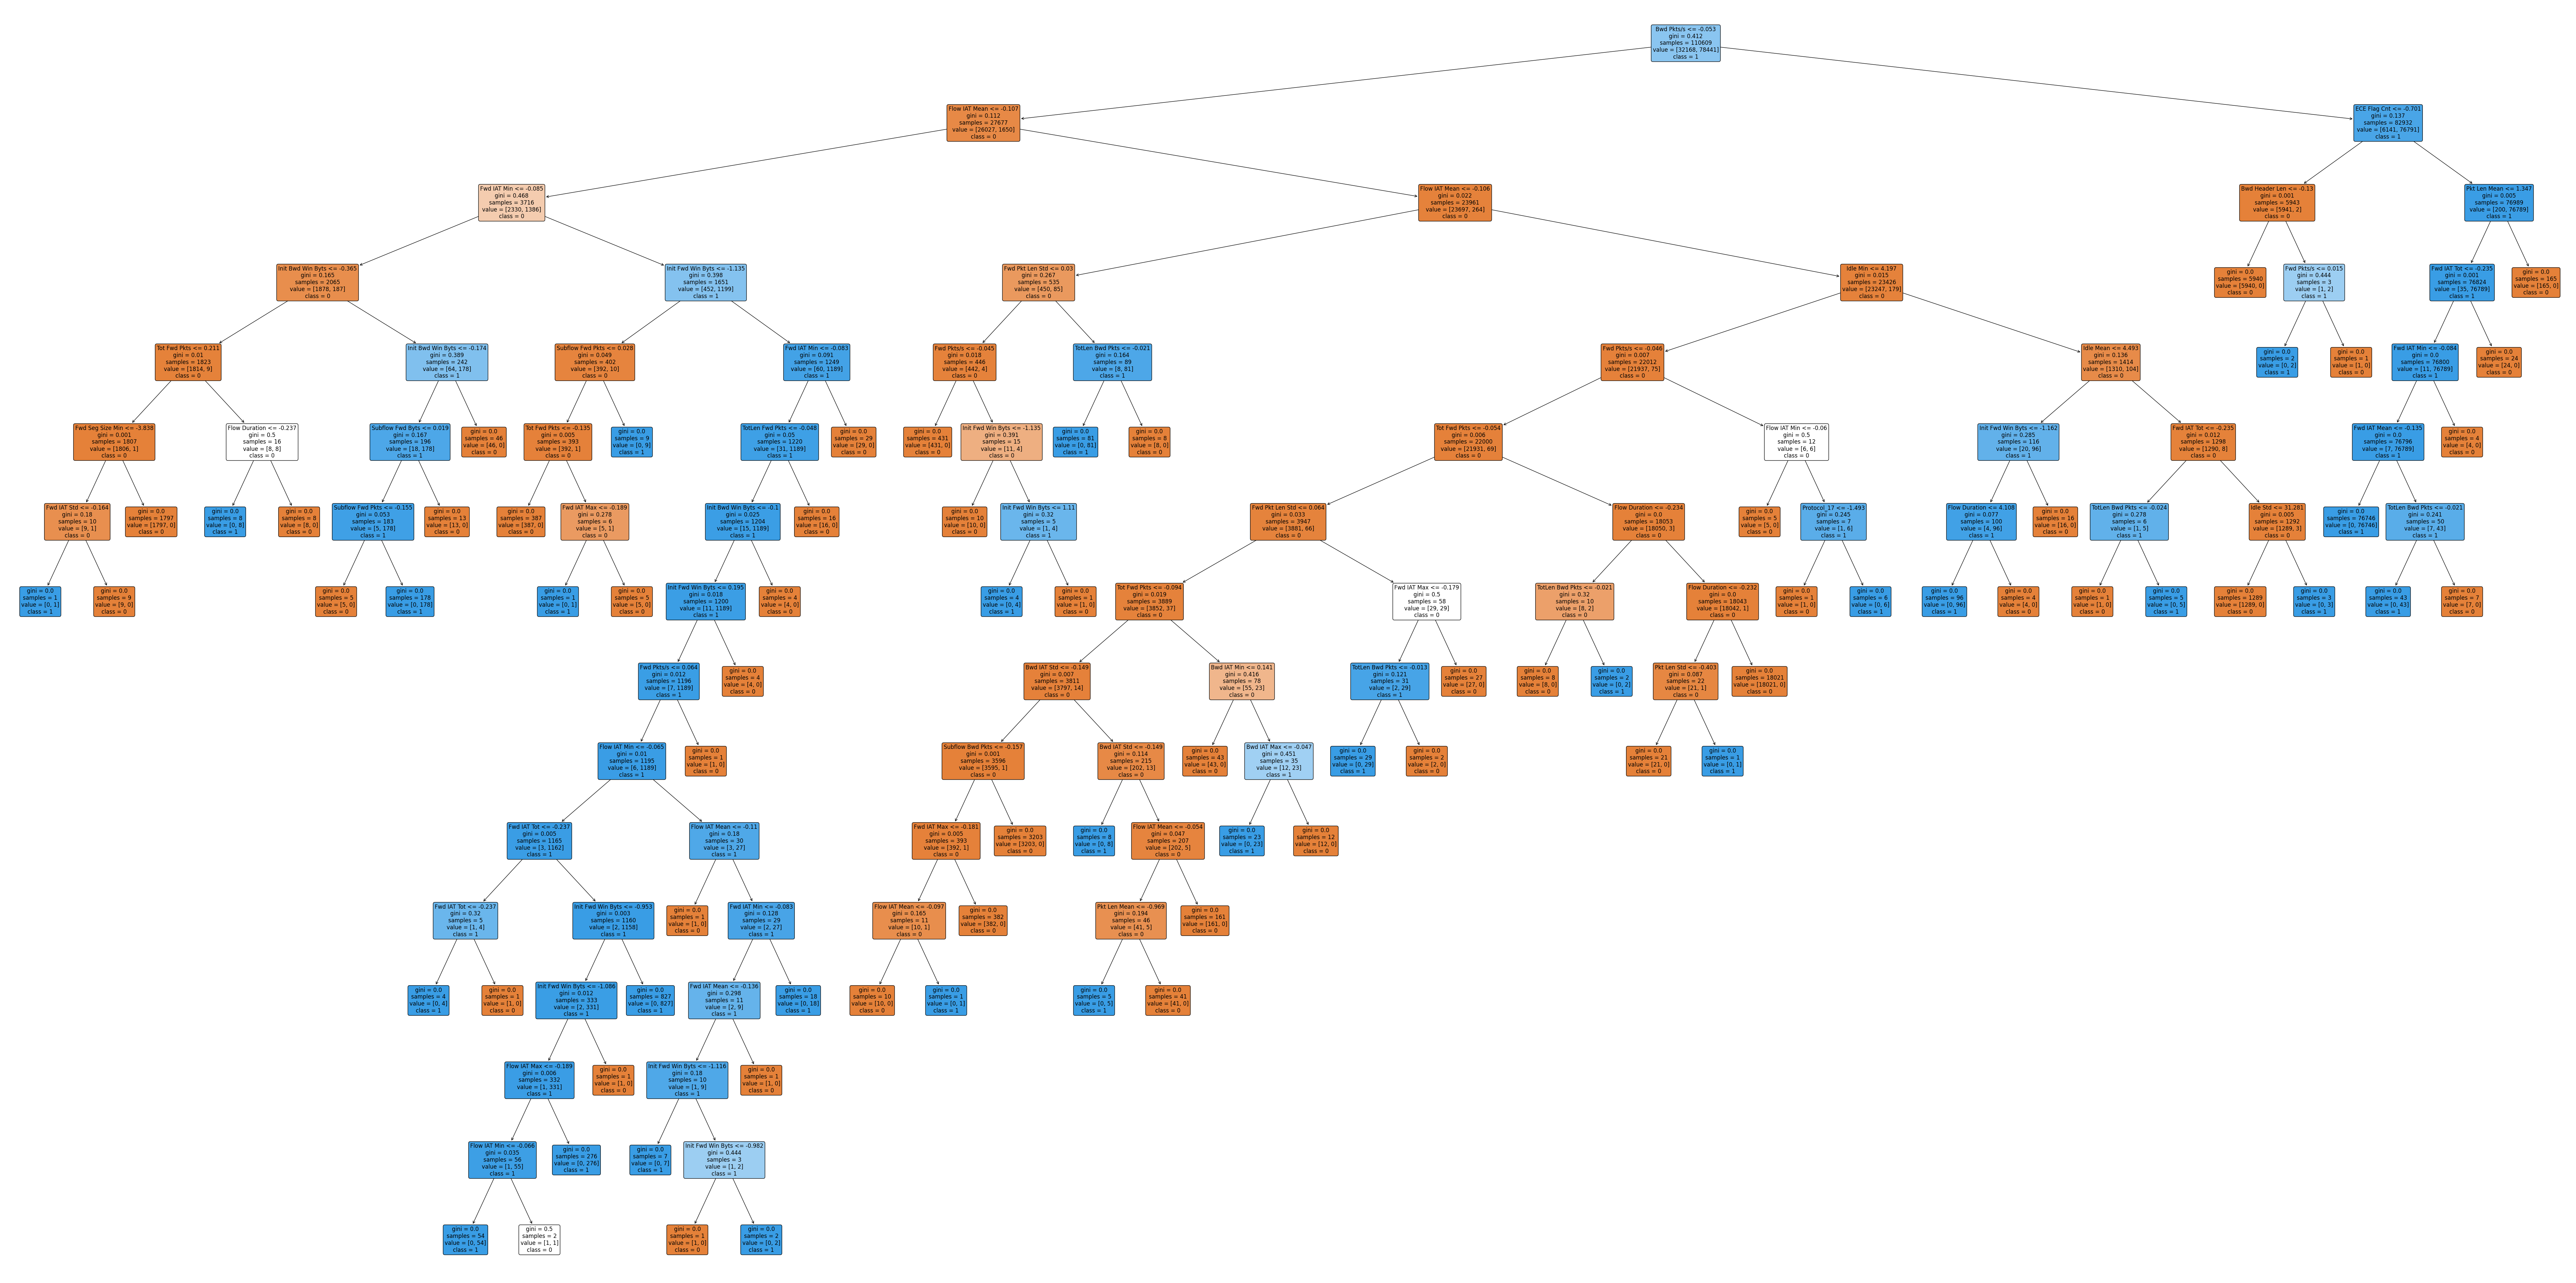

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
class_name_str=list(map(str,dt_classifier.classes_))
plt.figure(figsize=(100,50))
plot_tree(dt_classifier,feature_names=original_columns,
class_names=class_name_str, filled=True,rounded=True,fontsize=12)
plt.savefig('decision_tree_visualization.png')
plt.show()


In [ ]:
pip install lime

In [ ]:
import lime
import lime.lime_tabular
from lime import lime_tabular

# Prepare the data for explanation (e.g., select a single instance or a subset)
# Let's assume 'X_test' contains the data you want to explain

# Instantiate the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train,
                                               feature_names=original_columns,
                                               class_names=class_name_str,
                                               mode='classification')

# Select a single instance from X_test for explanation (you can change this as needed)
instance_idx = 5
instance = X_test[instance_idx]

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(instance,
                                         dt_classifier.predict_proba,
                                         num_features=len(original_columns))

# Visualize the explanation
explanation.show_in_notebook()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [ ]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9996202932180149
F1 Score: 0.9997322225528116
Precision: 0.9996727359276449
Recall: 0.9997917162580338


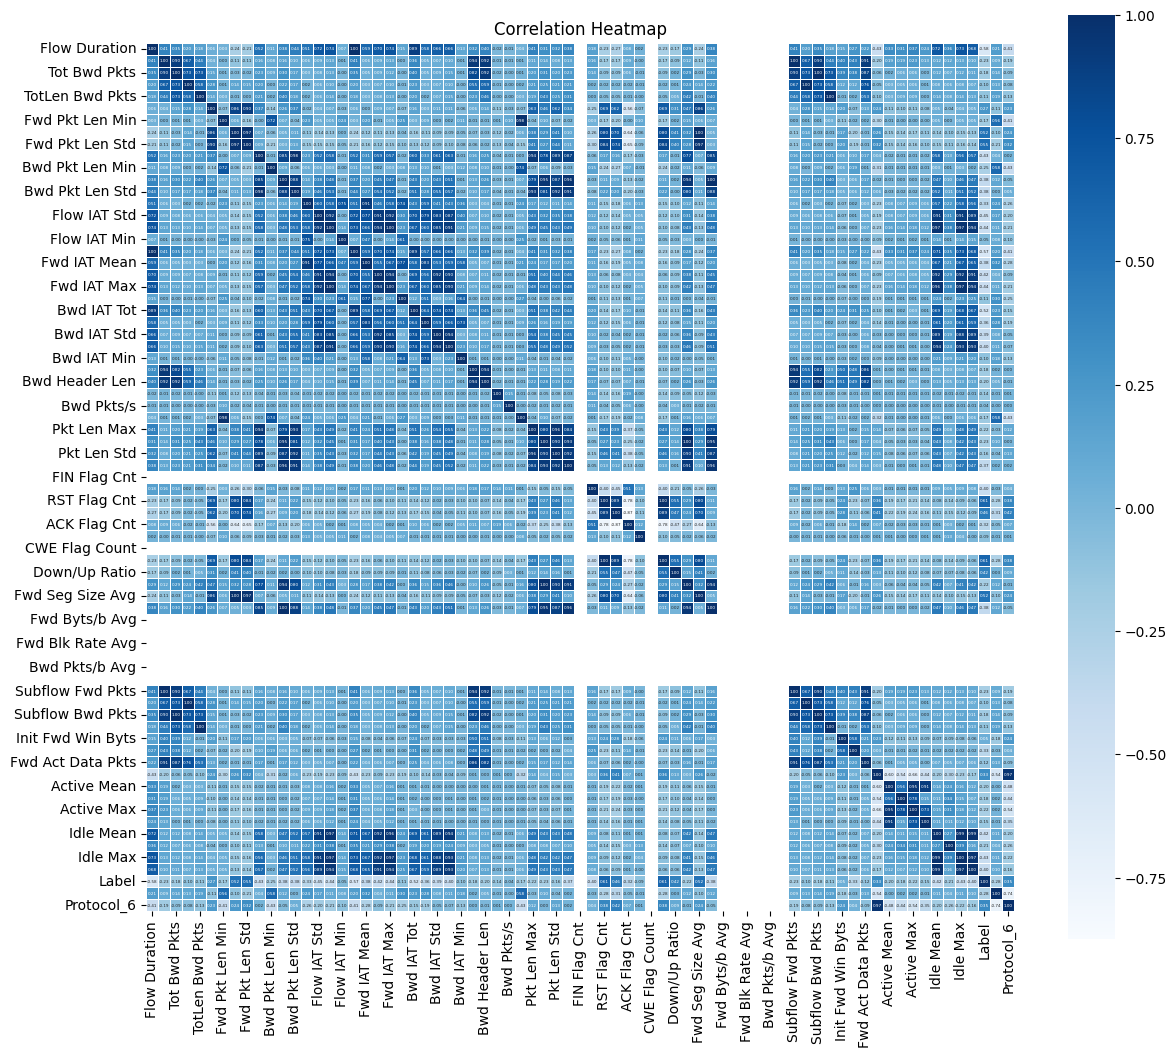

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with improved spacing, font size, and color tone
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 3}, square=True)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()


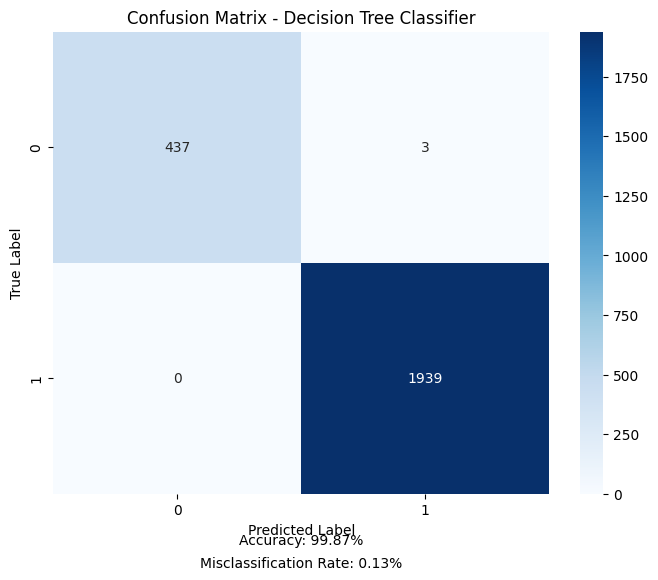

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, dt_classifier.predict(X_test))

# Calculate accuracy and misclassification rate
total_samples = len(y_test)
accuracy = (conf_matrix.diagonal().sum() / total_samples) * 100
misclassification_rate = ((total_samples - conf_matrix.diagonal().sum()) / total_samples) * 100

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add accuracy and misclassification rate to the plot
plt.text(0.5, -0.1, f'Accuracy: {accuracy:.2f}%', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.15, f'Misclassification Rate: {misclassification_rate:.2f}%', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


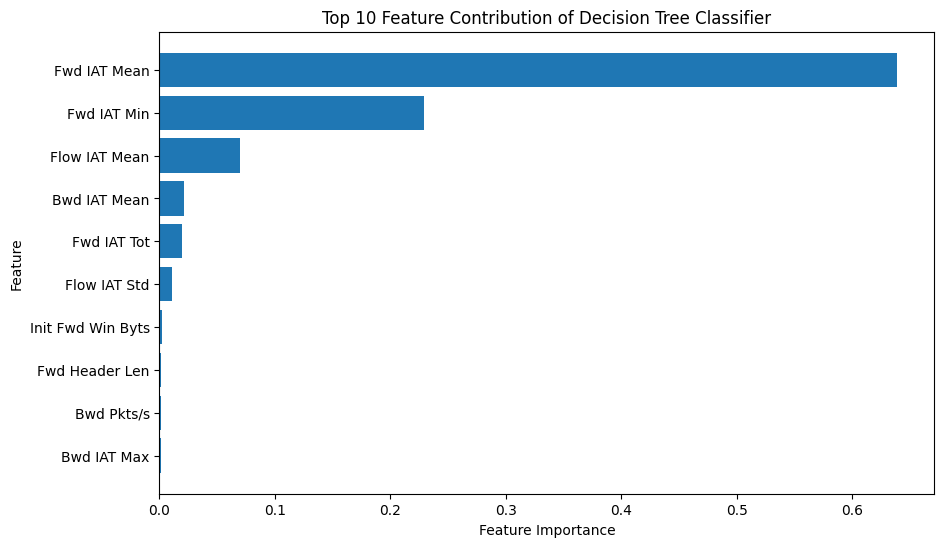

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained decision tree classifier
feature_importances = dt_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(original_columns)[sorted_indices]

# Select top 10 contributing features
top_feature_importances = sorted_feature_importances[:10]
top_feature_names = sorted_feature_names[:10]

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_importances)), top_feature_importances, align='center')
plt.yticks(range(len(top_feature_importances)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Contribution of Decision Tree Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [ ]:
import lime
import lime.lime_tabular

# Convert the top 10 features to their respective column indices
# Convert the top 10 features to their respective column indices
top_feature_indices = [np.where(original_columns == feature)[0][0] for feature in top_feature_names]

# Extract the top 10 features from the training and test data
X_train_top_features = X_train[:, top_feature_indices]
X_test_top_features = X_test[:, top_feature_indices]

# Instantiate the LIME explainer using the top 10 features
explainer_top_features = lime.lime_tabular.LimeTabularExplainer(X_train_top_features,
                                                                feature_names=top_feature_names,
                                                                class_names=class_name_str,
                                                                mode='classification')

# Select a single instance from X_test for explanation (you can change this as needed)
instance_idx = 0
instance = X_test_top_features[instance_idx]

# Explain the prediction for the selected instance using the top 10 features
explanation_top_features = explainer_top_features.explain_instance(instance,
                                                                   dt_classifier.predict_proba,
                                                                   num_features=10)

# Visualize the explanation for the top 10 features
explanation_top_features.show_in_notebook()
